In [ ]:
def count_parameters_conv(in_channels: int, out_channels: int, kernel_size: int, bias: bool):
    if bias:
        return (in_channels * (kernel_size ** 2) + 1) * out_channels
    else:
        return (in_channels * (kernel_size ** 2)) * out_channels


In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as T
from IPython.display import clear_output
from PIL import Image
from matplotlib import cm
from time import perf_counter
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from tqdm import tqdm

In [5]:
mnist = MNIST("E:\ML\datasets\mnist", download=True, train = False, transform = T.ToTensor())

Using downloaded and verified file: E:\ML\datasets\mnist\MNIST\raw\train-images-idx3-ubyte.gz
Extracting E:\ML\datasets\mnist\MNIST\raw\train-images-idx3-ubyte.gz to E:\ML\datasets\mnist\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting E:\ML\datasets\mnist\MNIST\raw\train-labels-idx1-ubyte.gz to E:\ML\datasets\mnist\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting E:\ML\datasets\mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to E:\ML\datasets\mnist\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting E:\ML\datasets\mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to E:\ML\datasets\mnist\MNIST\raw



In [6]:
mnist_train = MNIST(
    "E:\ML\datasets\mnist",
    train=True,
    download=True,
    transform=T.ToTensor()
)
mnist_valid = MNIST(
    "E:\ML\datasets\mnist",
    train=False,
    download=True,
    transform=T.ToTensor()
)

In [7]:
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)

In [8]:
valid_loader = DataLoader(mnist_valid, batch_size=64, shuffle=False)

In [11]:
def train(model: nn.Module) -> float:
    model.train()

    train_loss = 0

    for x, y in tqdm(train_loader, desc='Train'):
        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(output, y)

        train_loss += loss.item()

        loss.backward()

        optimizer.step()

    train_loss /= len(train_loader)

    return train_loss

In [12]:
@torch.inference_mode()
def evaluate(model: nn.Module, loader: DataLoader) -> tuple[float, float]:
    model.eval()

    total_loss = 0
    total = 0
    correct = 0

    for x, y in tqdm(loader, desc='Evaluation'):
        output = model(x)

        loss = loss_fn(output, y)

        total_loss += loss.item()

        _, y_pred = torch.max(output, 1)
        total += y.size(0)
        correct += (y_pred == y).sum().item()

    total_loss /= len(loader)
    accuracy = correct / total

    return total_loss, accuracy

In [13]:
def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    valid_accuracy: list[float],
    title: str):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')
    plt.legend()
    plt.grid()

    plt.show()

    plt.figure(figsize=(16, 8))

    plt.title(title + ' accuracy')

    plt.plot(valid_accuracy)
    plt.grid()

    plt.show()

In [14]:
first_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

optimizer = torch.optim.Adam(first_model.parameters(), lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

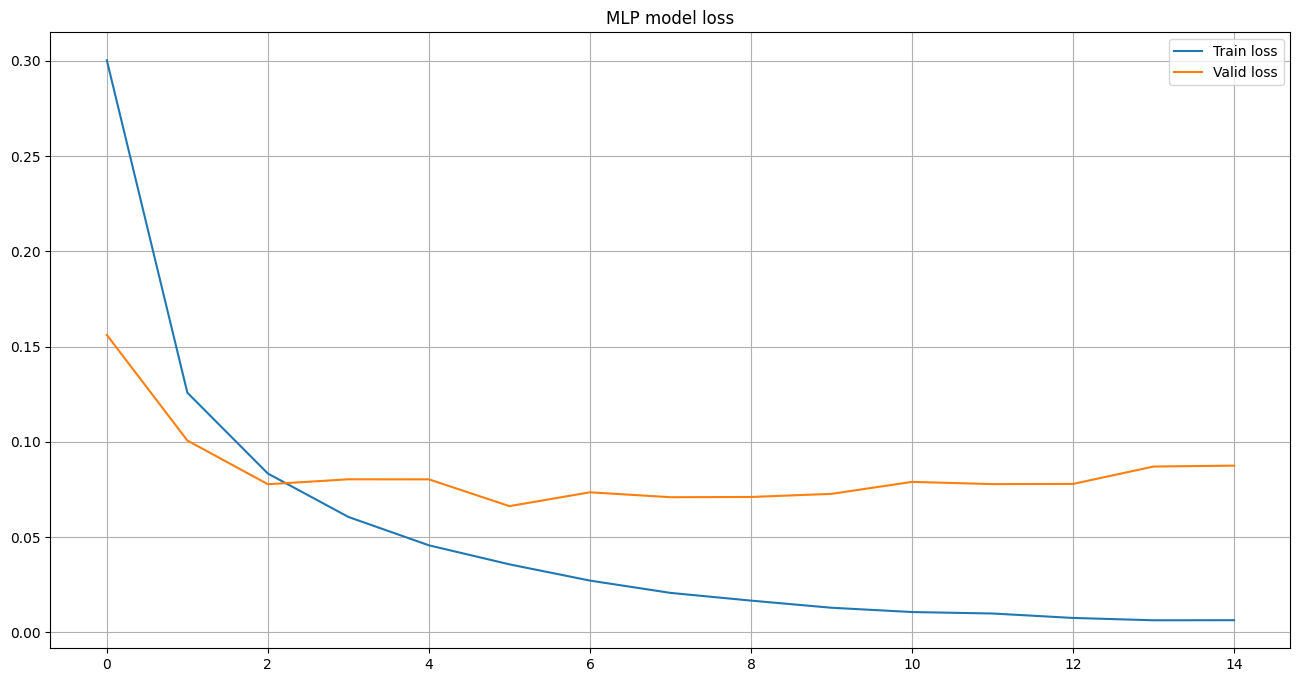

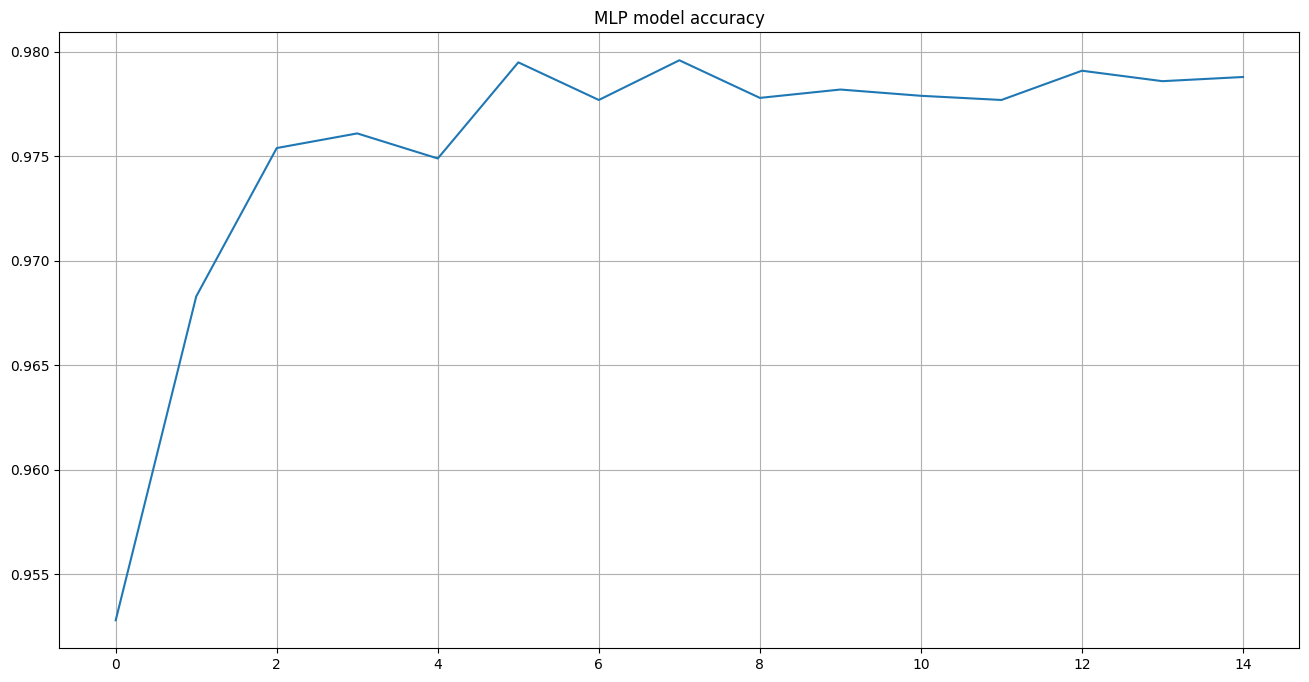

Total training and evaluation time 357.59345


In [15]:
num_epochs = 15

train_loss_history, valid_loss_history = [], []
valid_accuracy_history = []

start = perf_counter()

for epoch in range(num_epochs):
    train_loss = train(first_model)

    valid_loss, valid_accuracy = evaluate(first_model, valid_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    valid_accuracy_history.append(valid_accuracy)

    clear_output()

    plot_stats(train_loss_history, valid_loss_history, valid_accuracy_history, 'MLP model')

print(f'Total training and evaluation time {perf_counter() - start:.5f}')